<a href="https://colab.research.google.com/github/Krukalex/Wisconsin-Breast-Cancer-Classification/blob/main/Wisconsin_Breast_Cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [ ]:
#! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 21.7MB/s]


In [ ]:
!unzip breast-cancer-wisconsin-data.zip

Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
rnd_seed=23
np.random.seed(rnd_seed)

#Uni-modal exploratory analysis

In [ ]:
data=pd.read_csv('data.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
#drop ID since it is not necessary

data.drop('id', axis=1, inplace=True)
data.drop('Unnamed: 32', axis=1, inplace=True)

In [ ]:
#check for null values

data.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

We will be attempting to predict diagnosis being either malignant or benign


This data is compiled for each cancer cell

In [ ]:
types=data.groupby('diagnosis')['diagnosis'].count()

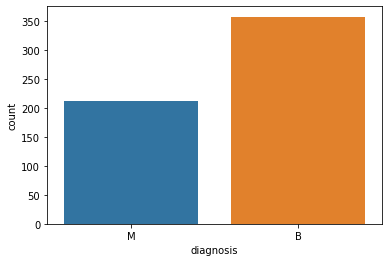

In [ ]:
#mostly benign tumors

sns.countplot(x="diagnosis", data=data);

In [ ]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


##Hypotheses

1) larger and less smooth tumors are more likely to be malignant

2) There is probably a certain size cutoff above which cancer is far more likley to  be malignant, which could be incorporated as a binary categorical variable
  - This can likely be repeated for concavity, perimiter, area, smoothness, symmetry etc

3)Having the largest cell (worst) at least a certain size likely correlates to chances of being malignant

4)Large values for area or radius probably correlate with smoothness or concavity

##Distributions

In [ ]:
#malignant tumors have larger radii on average

data.groupby('diagnosis')['radius_mean'].mean()

diagnosis
B    12.146524
M    17.462830
Name: radius_mean, dtype: float64

###Means

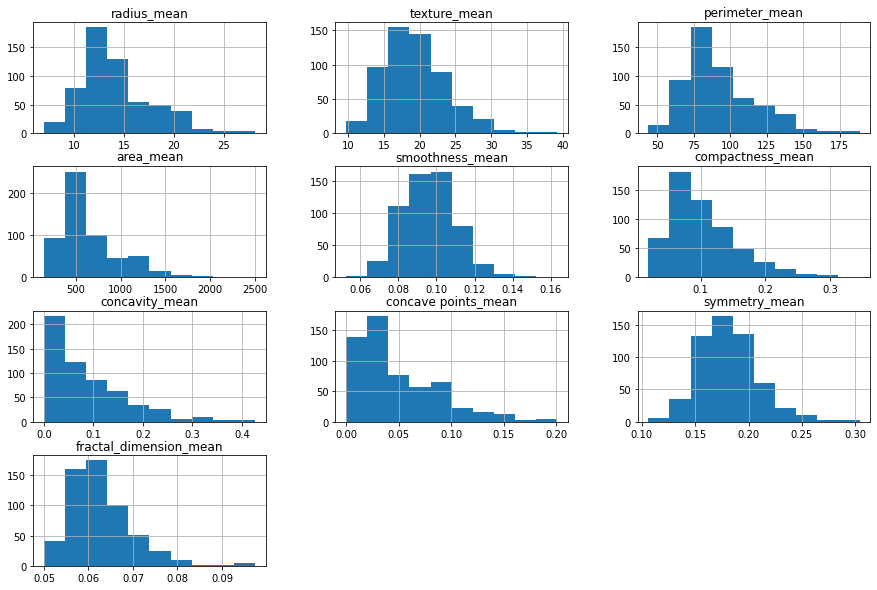

In [ ]:
data_mean = data.iloc[:, 1:11]
data_mean.hist(bins=10, figsize=(15, 10), grid=True);

###Standard Errors

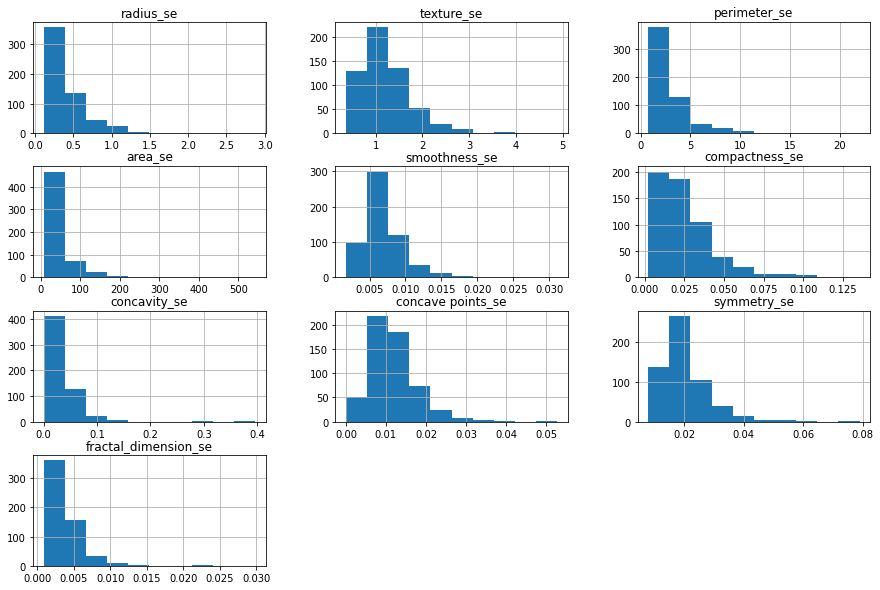

In [ ]:
data_mean = data.iloc[:, 11:21]
data_mean.hist(bins=10, figsize=(15, 10), grid=True);

###Worst

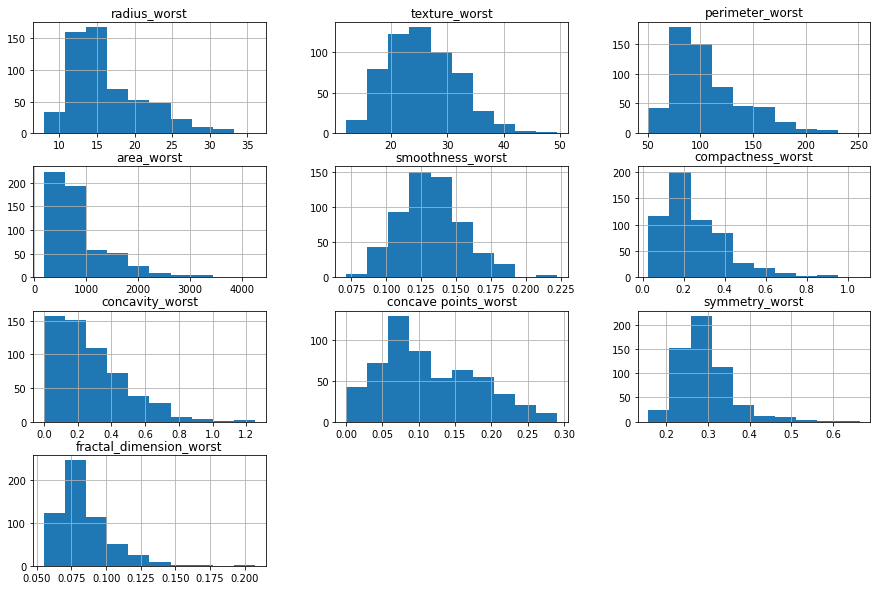

In [ ]:
data_mean = data.iloc[:, 21:]
data_mean.hist(bins=10, figsize=(15, 10), grid=True);

Conclusions
- concavity and area may have exponential distributions
- Symmetry and smoothness and texture seem to be gaussian

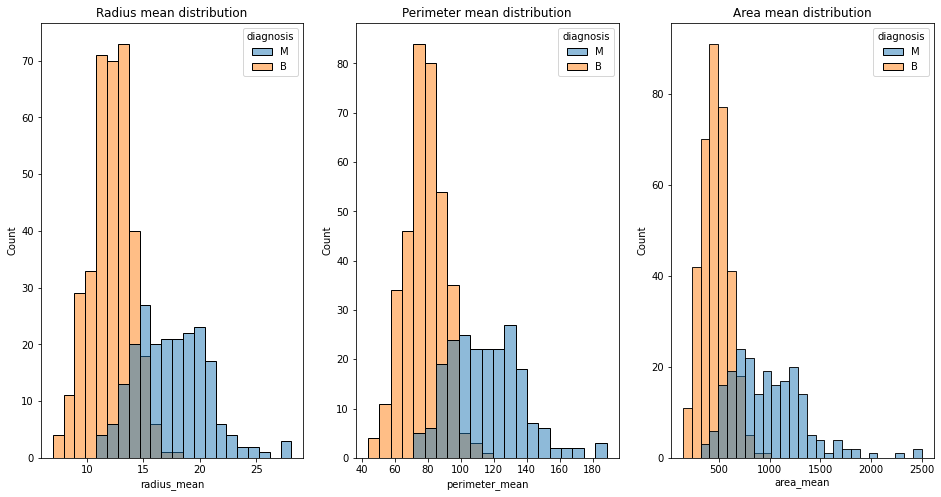

In [ ]:
#all variables seems to be relatively normally distibuted
#the mean of malignant tumors is clearly higher than that of benign ones
#all of them have basically the same distribution relative to each other

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,8))

sns.histplot(data, x="radius_mean", hue="diagnosis", ax=ax1)
sns.histplot(data, x="perimeter_mean", hue="diagnosis",ax=ax2)
sns.histplot(data, x="area_mean", hue="diagnosis", ax=ax3)
ax1.set(title='Radius mean distribution')
ax2.set(title='Perimeter mean distribution')
ax3.set(title='Area mean distribution');

Area, size and perimeter are seem to have the same general shape to their distributions

###Smoothness, texture, concavity

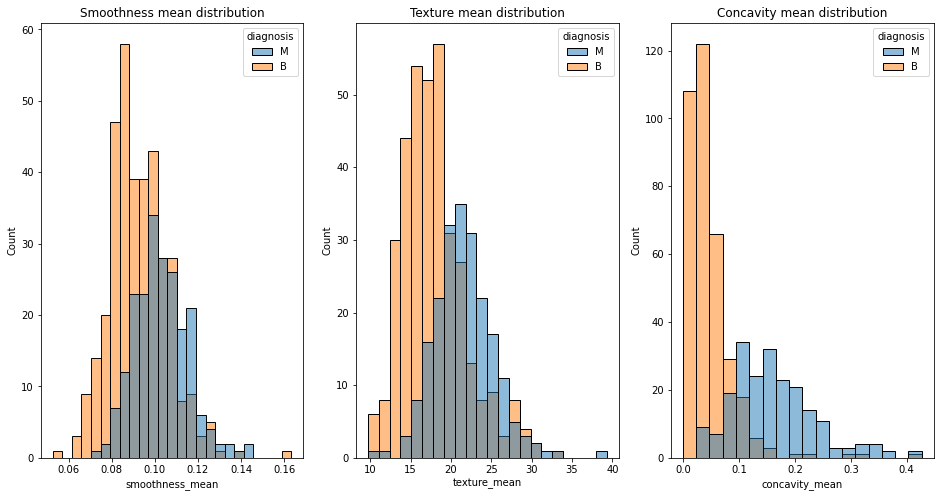

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,8))

sns.histplot(data, x="smoothness_mean", hue="diagnosis", ax=ax1)
sns.histplot(data, x="texture_mean", hue="diagnosis",ax=ax2)
sns.histplot(data, x="concavity_mean", hue="diagnosis", ax=ax3)
ax1.set(title='Smoothness mean distribution')
ax2.set(title='Texture mean distribution')
ax3.set(title='Concavity mean distribution');

- Smoothness and texture seem to have a much closer distributions between benign and malignant tumors
-The concavity of benign tumors seems to be much more concentrated around the mean than other metrics
-malignant tumors have a more normal concavity distribution, where benign ones seem to be right skewed

###symmetry, compactness and fractal dimension

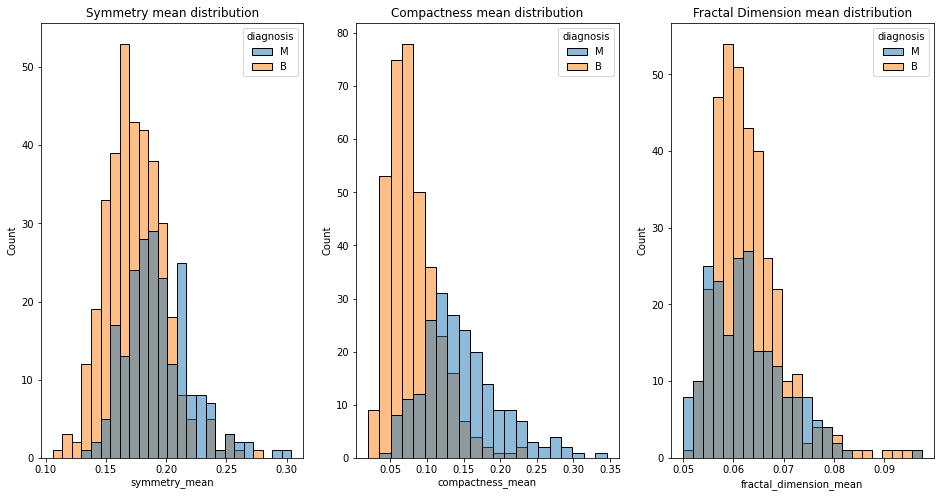

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,8))

sns.histplot(data, x="symmetry_mean", hue="diagnosis", ax=ax1)
sns.histplot(data, x="compactness_mean", hue="diagnosis",ax=ax2)
sns.histplot(data, x="fractal_dimension_mean", hue="diagnosis", ax=ax3)
ax1.set(title='Symmetry mean distribution')
ax2.set(title='Compactness mean distribution')
ax3.set(title='Fractal Dimension mean distribution');

##Density Plots

###means

In [ ]:
data_mean = data.iloc[:, 1:11]
data_mean.plot(kind='density', subplots=True, layout=(4,3), sharex=False, sharey=False, fontsize=12, figsize=(15,10));

NameError: ignored

- symmetry smoothness and texture seem fairly normal still
- radius, perimeter, area and concavity are definitely right skewed

###Standard Errors

In [ ]:
data_mean = data.iloc[:, 11:21]
data_mean.plot(kind='density', subplots=True, layout=(4,3), sharex=False, sharey=False, fontsize=12, figsize=(15,10));

- most of th standard errors are right skewed
  - presence of large abnormally poitive values

###Worst

In [ ]:
data_mean = data.iloc[:, 21:31]
data_mean.plot(kind='density', subplots=True, layout=(4,3), sharex=False, sharey=False, fontsize=12, figsize=(15,10));

Conclusions

- additional evidence for normality of texture, smoothness and symmetry as well as exponential dist of area, radius, compactness, perimeter, and concavity
- Standard errors are right skewed

##Boxplots

####Means

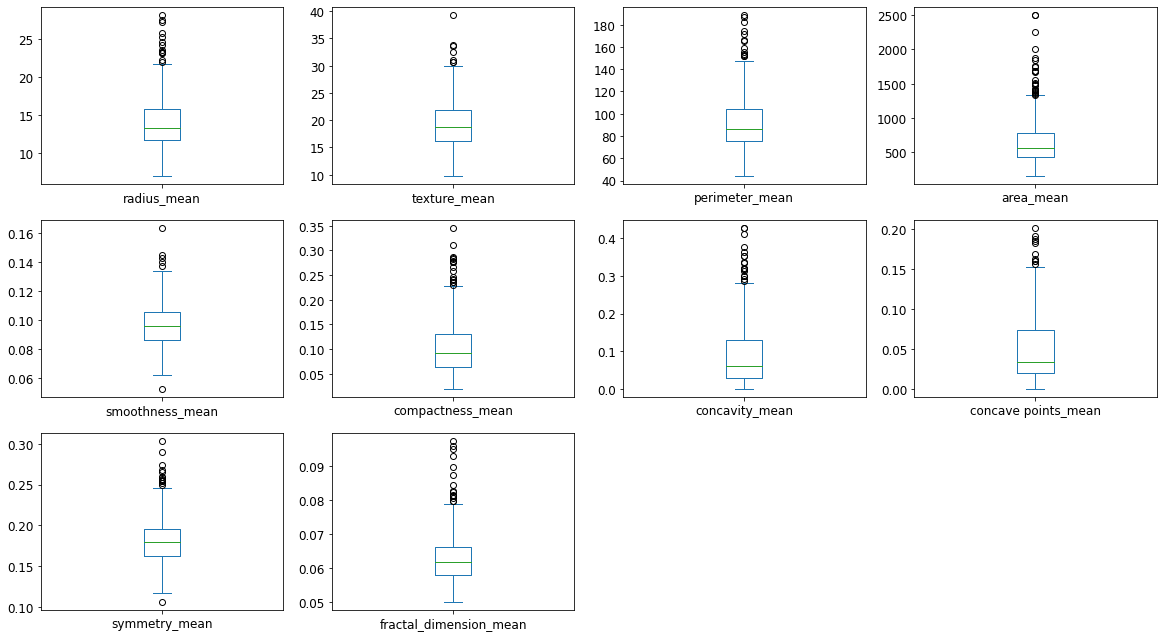

In [ ]:
data_mean=data.iloc[:,1:11]
data_mean.plot(kind='box', subplots=True, layout=(4,4), figsize=(20,15), sharex=False, sharey=False, fontsize=12);

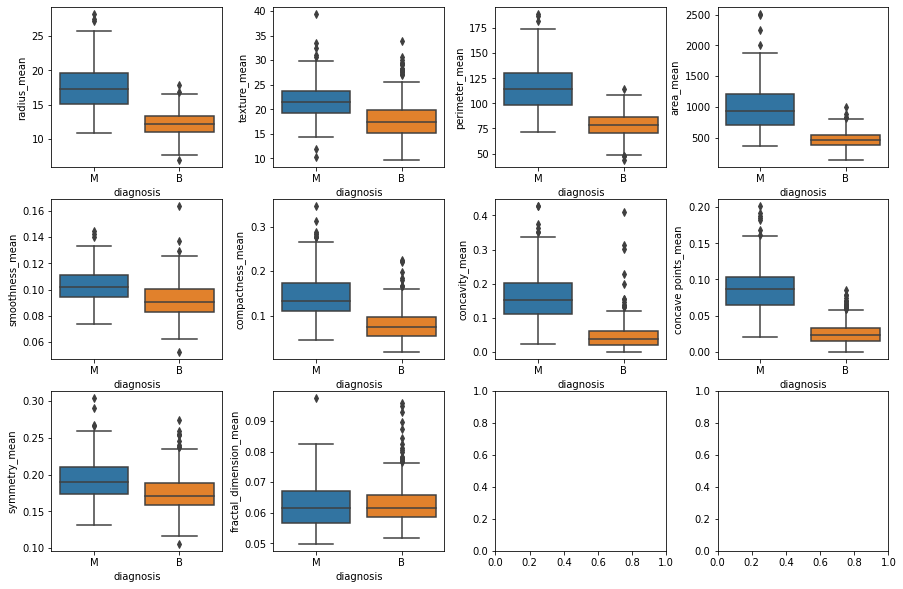

In [ ]:
fig, axes= plt.subplots(3,4, figsize=(15,10))
fig.subplots_adjust(hspace =.2, wspace=.3)
axes=axes.ravel()
for i, col in enumerate(data.columns[1:11]):
    _= sns.boxplot(y=col, x='diagnosis', data=data, ax=axes[i])

####Standard Errors

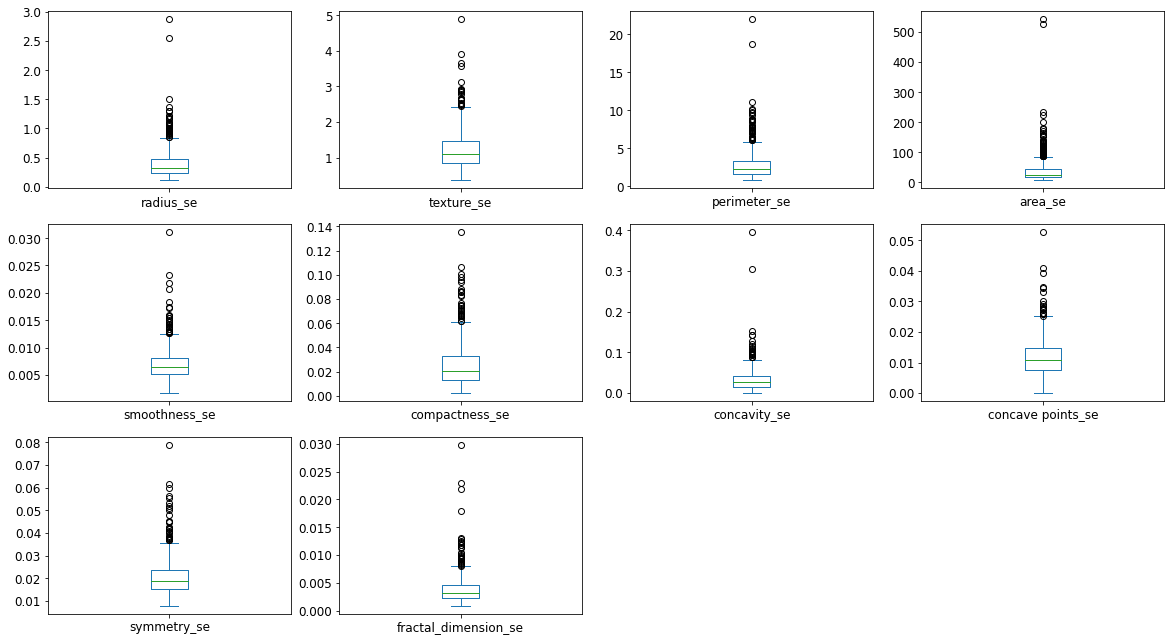

In [ ]:
data_mean=data.iloc[:,11:21]
data_mean.plot(kind='box', subplots=True, layout=(4,4), figsize=(20,15), sharex=False, sharey=False, fontsize=12);

####Worst

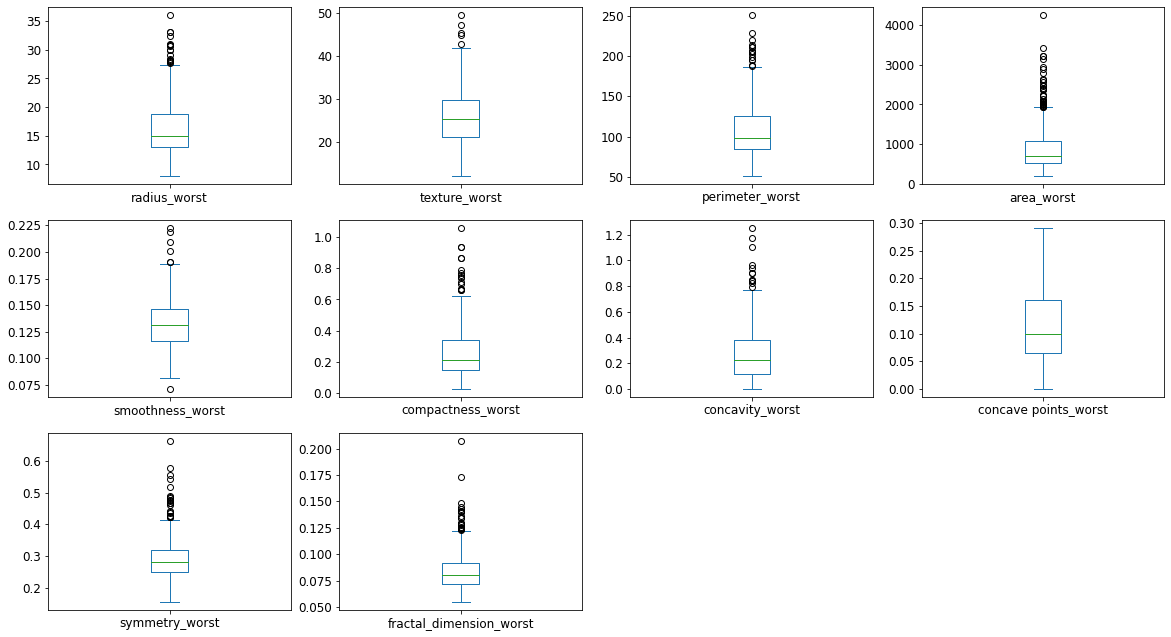

In [ ]:
data_mean=data.iloc[:,21:31]
data_mean.plot(kind='box', subplots=True, layout=(4,4), figsize=(20,15), sharex=False, sharey=False, fontsize=12);

Conclusions
- almost all of the outliers are on the high end
- texture symmetry and smoothness have relatively few outliers
- radius, area, perimeter, concavity and compactness have many more outliers
- confirms findings from previous two graph types
- may need a logarithmic transformation for radius, area, perimeter, concavity, and compactness

#Multi-modal exploratory analysis

##Correlation

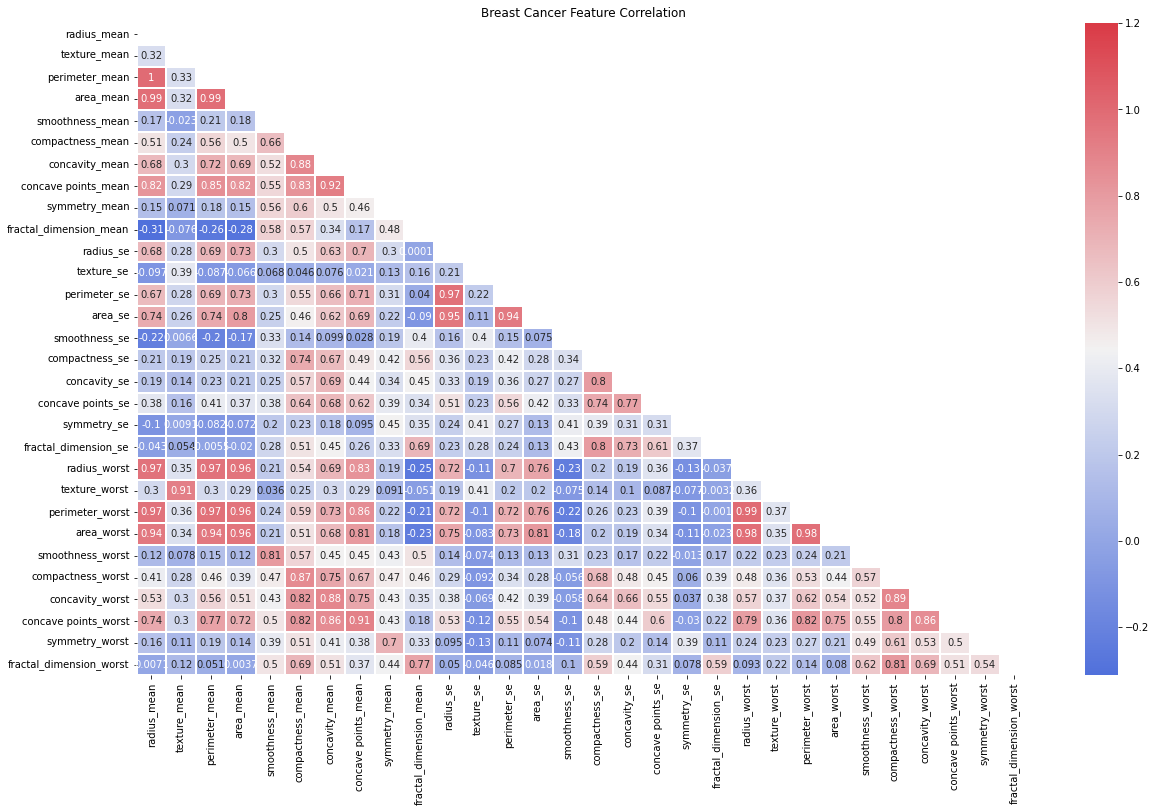

In [ ]:
corr=data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square=False, cmap=cmap, mask=mask, ax=ax, annot=True, fmt='.2g', linewidths=1);
#sns.heatmap(corrMatt, mask=mask, vmax=1.2, square=True, annot=True, fmt='.2g', ax=ax);

- perimeter, radius and area all basically have a correlation of 1
- concavity points mean strongly correlates to area, perimeter, radius and also concavity mean
- worst perimeter, radius, area and concavity all strongly correlate with perimeter area and radius
- perimeter negatively correlates with smoothness and fractal dimension mean
  - as do radius and area
- compactness correlates with concavity
- 

##Scatterplots

###Means

In [ ]:
sns.pairplot(data[list(data.columns[1:11]) + ['diagnosis']], hue="diagnosis");

Error in callback <function flush_figures at 0x7fc82e53c050> (for post_execute):


KeyboardInterrupt: ignored

###Standard Errors

In [ ]:
sns.pairplot(data[list(data.columns[11:21]) + ['diagnosis']], hue="diagnosis");

###Worst

In [ ]:
sns.pairplot(data[list(data.columns[21:31]) + ['diagnosis']], hue="diagnosis");

Conclusions
- confirms previous analysis
- concavity correlated with compactness
- radius correlates with area, and perimeter
- concavity correlates with area mean and perimeter
- radius, area, perimeter, compactness and concavity values all show higher values associated with malignant tumors, so these should be used to classify it
- texture, smoothness, fractal dimesnion and symmetry don't show preference one way or the other
- No large outliers that need to be cleaned up

#Data Preprocessing

What would I do

- consider logarithmic transformation for normalization
- principal component analysis
- encode categorical attributes (Diagnosis)

##Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
diagnosis_encoded = encoder.fit_transform(data['diagnosis'])

In [ ]:
data['diagnosis']=diagnosis_encoded

##Standardization

Since we saw that many of the variables had different distributions, standardizing will bring all distributions to a gaussian distribution with mean 0 and standard deviation of 1

In [ ]:
#split up predictor and response variables

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

##Feature decomposition: PCA

reduce to 2 dimensions but try to retain as many features and as much variation as possible in the process

In [ ]:
feature_names = list(X.columns)

In [ ]:
#reduce to 10 principal components

from sklearn.decomposition import PCA

# dimensionality reduction
pca = PCA(n_components=10)

Xs_pca = pca.fit_transform(Xs)

In [ ]:
#build a dataframe using the first two principal components
#sample 5 values from each principal component

PCA_df = pd.DataFrame()
PCA_df['PCA_1'] = Xs_pca[:,0]
PCA_df['PCA_2'] = Xs_pca[:,1]
PCA_df.sample(5)

,PCA_1,PCA_2
401,-3.430771,-0.992610
25,7.098563,2.018610
260,3.378251,-3.371228
382,-1.554852,0.979858
12,8.185034,2.700976


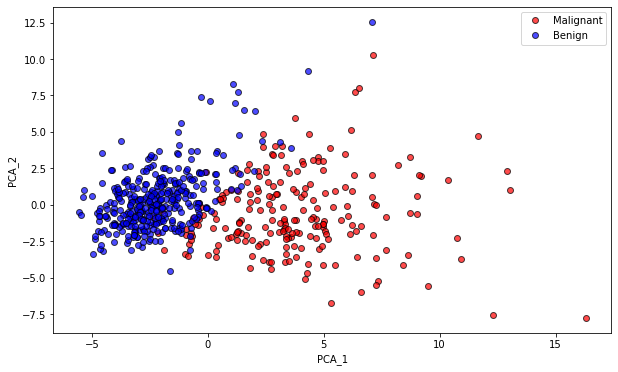

In [ ]:
#plot pca one and two
#pca one seems to account for far more variation than pca 2

plt.figure(figsize=(10,6))
plt.plot(PCA_df['PCA_1'][data['diagnosis'] == 1],PCA_df['PCA_2'][data['diagnosis'] == 1],'ro', alpha = 0.7, markeredgecolor = 'k')
plt.plot(PCA_df['PCA_1'][data['diagnosis'] == 0],PCA_df['PCA_2'][data['diagnosis'] == 0],'bo', alpha = 0.7, markeredgecolor = 'k')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign']);

How many PCAs to retain

We can use scree plots to show how much variation each PCA accounts for

In [ ]:
# PCA explained variance - The amount of variance that each PC explains
var_exp = pca.explained_variance_ratio_
var_exp

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

In [ ]:
# Cumulative Variance explains

cum_var_exp = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4))
cum_var_exp

array([0.4427, 0.6324, 0.7263, 0.7923, 0.8473, 0.8875, 0.91  , 0.9259,
       0.9398, 0.9515])

In [ ]:
# combining above two
var_exp_ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
variance_ratios_df = pd.DataFrame(np.round(var_exp_ratios, 4), columns = ['Explained Variance'])
variance_ratios_df['Cumulative Explained Variance'] = variance_ratios_df['Explained Variance'].cumsum()

# Dimension indexing
dimensions = ['PCA_Component_{}'.format(i) for i in range(1, len(pca.components_) + 1)]

variance_ratios_df.index = dimensions
variance_ratios_df

,Explained Variance,Cumulative Explained Variance
PCA_Component_1,0.4427,0.4427
PCA_Component_2,0.1897,0.6324
PCA_Component_3,0.0939,0.7263
PCA_Component_4,0.0660,0.7923
PCA_Component_5,0.0550,0.8473
PCA_Component_6,0.0402,0.8875
PCA_Component_7,0.0225,0.9100
PCA_Component_8,0.0159,0.9259
PCA_Component_9,0.0139,0.9398
PCA_Component_10,0.0117,0.9515


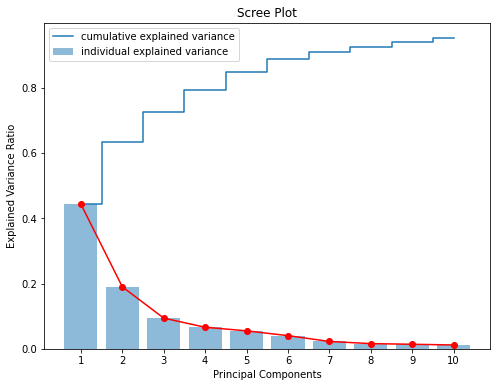

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(range(1, len(pca.components_) + 1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(pca.components_) + 1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.plot(range(1, len(pca.components_) + 1), var_exp, 'ro-')
plt.xticks(range(1, len(pca.components_) + 1))
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.legend(loc='best');

seems we should only incorportate the first 3 principal components

In [ ]:
#how much each pca weights each component

components_df=pd.DataFrame(np.round(pca.components_, 4), columns=feature_names)
dimension=['PCA_{}'.format(i) for i in range(1,len(pca.components_)+1)]
components_df.index=dimension
components_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
PCA_1,0.2189,0.1037,0.2275,0.2210,0.1426,0.2393,0.2584,0.2609,0.1382,0.0644,...,0.2280,0.1045,0.2366,0.2249,0.1280,0.2101,0.2288,0.2509,0.1229,0.1318
PCA_2,-0.2339,-0.0597,-0.2152,-0.2311,0.1861,0.1519,0.0602,-0.0348,0.1903,0.3666,...,-0.2199,-0.0455,-0.1999,-0.2194,0.1723,0.1436,0.0980,-0.0083,0.1419,0.2753
PCA_3,-0.0085,0.0645,-0.0093,0.0287,-0.1043,-0.0741,0.0027,-0.0256,-0.0402,-0.0226,...,-0.0475,-0.0423,-0.0485,-0.0119,-0.2598,-0.2361,-0.1731,-0.1703,-0.2713,-0.2328
PCA_4,0.0414,-0.6031,0.0420,0.0534,0.1594,0.0318,0.0191,0.0653,0.0671,0.0486,...,0.0154,-0.6328,0.0138,0.0259,0.0177,-0.0913,-0.0740,0.0060,-0.0363,-0.0771
PCA_5,0.0378,-0.0495,0.0374,0.0103,-0.3651,0.0117,0.0864,-0.0439,-0.3059,-0.0444,...,-0.0044,-0.0929,0.0075,-0.0274,-0.3244,0.1218,0.1885,0.0433,-0.2446,0.0944
PCA_6,0.0187,-0.0322,0.0173,-0.0019,-0.2864,-0.0141,-0.0093,-0.0520,0.3565,-0.1194,...,-0.0003,-0.0500,0.0085,-0.0252,-0.3693,0.0477,0.0284,-0.0309,0.4989,-0.0802
PCA_7,-0.1241,0.0114,-0.1145,-0.0517,-0.1407,0.0309,-0.1075,-0.1505,-0.0939,0.2958,...,-0.0097,0.0099,-0.0004,0.0678,-0.1088,0.1405,-0.0605,-0.1680,-0.0185,0.3747
PCA_8,-0.0075,0.1307,-0.0187,0.0347,-0.2890,-0.1514,-0.0728,-0.1523,-0.2315,-0.1771,...,0.0426,0.0363,0.0306,0.0794,0.2059,0.0840,0.0725,-0.0362,0.2282,0.0484
PCA_9,-0.2231,0.1127,-0.2237,-0.1956,0.0064,-0.1678,0.0406,-0.1120,0.2560,-0.1237,...,-0.1121,0.1033,-0.1096,-0.0807,0.1123,-0.1007,0.1619,0.0605,0.0646,-0.1342
PCA_10,0.0955,0.2409,0.0864,0.0750,-0.0693,0.0129,-0.1356,0.0081,0.5721,0.0811,...,0.0774,0.0296,0.0505,0.0699,-0.1283,-0.1721,-0.3116,-0.0766,-0.0296,0.0126


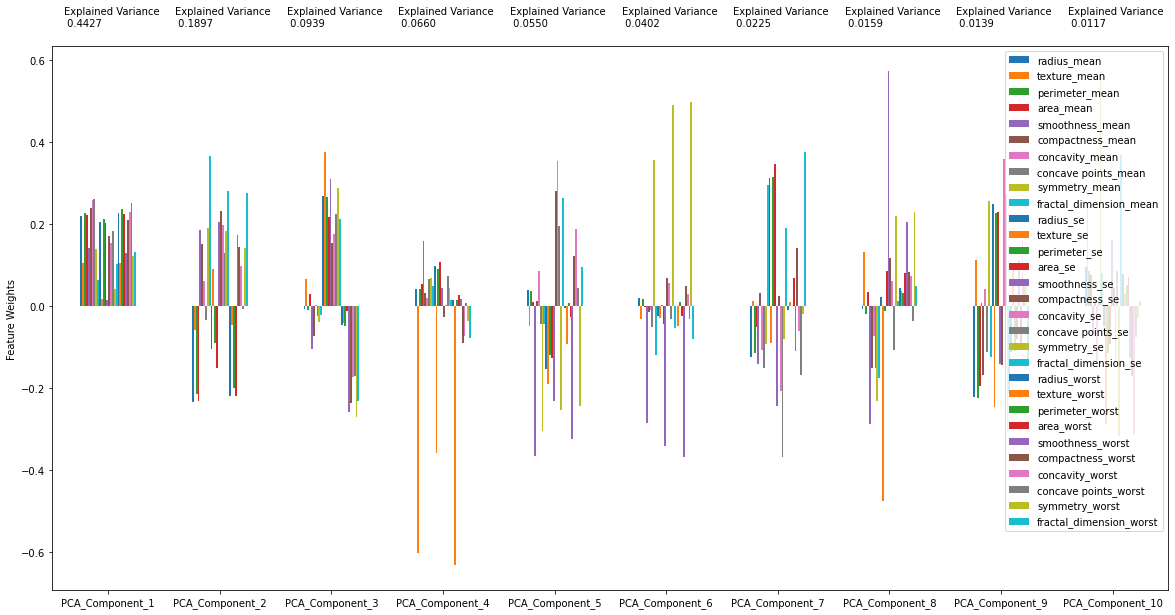

In [ ]:
# Plot the feature weights as a function of the components
# Create a bar plot visualization

fig, ax = plt.subplots(figsize = (20, 10))

_=components_df.plot(kind='bar', ax=ax)
_ = ax.set_ylabel("Feature Weights")
_ = ax.set_xticklabels(dimensions, rotation=0)

for i, ev in enumerate(pca.explained_variance_ratio_):
  _=ax.text(i-.40, ax.get_ylim()[1]+0.05,"Explained Variance\n %.4f"%(ev))

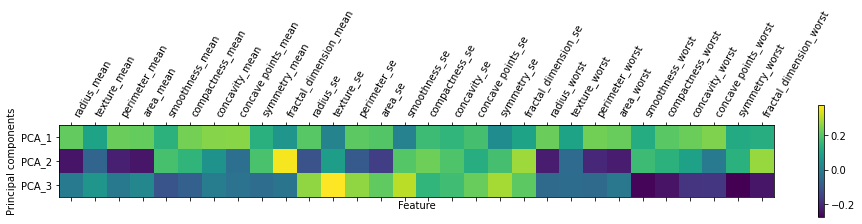

In [ ]:
# vizualizing principle components as a heatmap this allows us to see what dimensions in the 'original space' are active

plt.matshow(pca.components_[0:3])
plt.yticks([0, 1, 2], ["PCA_1", "PCA_2", "PCA_3"])
plt.colorbar()
plt.xticks(range(len(feature_names)), feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

PCA biplot

In [ ]:
pca = PCA(n_components=2).fit(Xs)

# Transform the original data using the PCA fit above
Xs_pca = pca.transform(Xs)

# Create a DataFrame for the pca transformed data
Xs_df = pd.DataFrame(Xs, columns=feature_names)

# Create a DataFrame for the pca transformed data
Xs_pca_df = pd.DataFrame(Xs_pca, columns = ['PCA_1', 'PCA_2'])

In [ ]:
pca.components_.T

array([[ 0.21890244, -0.23385713],
       [ 0.10372458, -0.05970609],
       [ 0.22753729, -0.21518136],
       [ 0.22099499, -0.23107671],
       [ 0.14258969,  0.18611302],
       [ 0.23928535,  0.15189161],
       [ 0.25840048,  0.06016536],
       [ 0.26085376, -0.0347675 ],
       [ 0.13816696,  0.19034877],
       [ 0.06436335,  0.36657547],
       [ 0.20597878, -0.10555215],
       [ 0.01742803,  0.08997968],
       [ 0.21132592, -0.08945723],
       [ 0.20286964, -0.15229263],
       [ 0.01453145,  0.20443045],
       [ 0.17039345,  0.2327159 ],
       [ 0.15358979,  0.19720728],
       [ 0.1834174 ,  0.13032156],
       [ 0.04249842,  0.183848  ],
       [ 0.10256832,  0.28009203],
       [ 0.22799663, -0.21986638],
       [ 0.10446933, -0.0454673 ],
       [ 0.23663968, -0.19987843],
       [ 0.22487053, -0.21935186],
       [ 0.12795256,  0.17230435],
       [ 0.21009588,  0.14359317],
       [ 0.22876753,  0.09796411],
       [ 0.25088597, -0.00825724],
       [ 0.12290456,

In [ ]:
Xs.shape, pca.components_.T.shape

((569, 30), (30, 2))

In [ ]:
def biplot(original_data, reduced_data, pca):
    fig, ax = plt.subplots(figsize = (20, 15))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'PCA_1'], y=reduced_data.loc[:, 'PCA_2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 30.0, 32.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=1, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, original_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=9)

    ax.set_xlabel("PCA_1", fontsize=14)
    ax.set_ylabel("PCA_2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

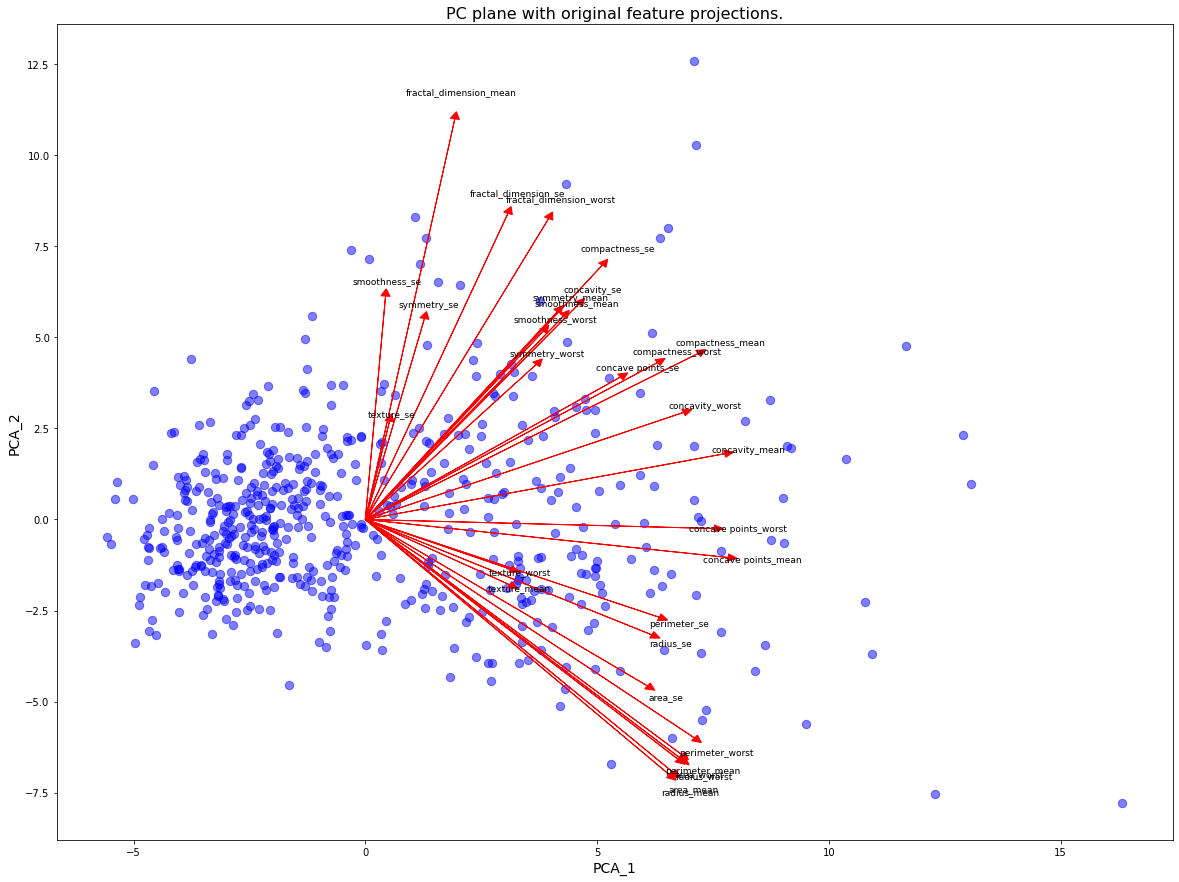

In [ ]:
biplot(Xs_df, Xs_pca_df, pca);

- We should not combine the train and test set to obtain PCA components of whole data at once. Because, this would violate the entire assumption of generalization since test data would get ‘leaked’ into the training set. In other words, the test data set would no longer remain ‘unseen’. Eventually, this will hammer down the generalization capability of the model.

- We should not perform PCA on test and train data sets separately. Because, the resultant vectors from train and test PCAs will have different directions ( due to unequal variance). Due to this, we’ll end up comparing data registered on different axes. Therefore, the resulting vectors from train and test data should have same axes.

- We should do exactly the same transformation to the test set as we did to training set, including the center and scaling feature.



##Feature selection using t-SNE

t-SNE=t-Distributed Stochastic Neighbor Embedding

- dimensionality reduction technique
- suited to high dimension data
- not a mathmatical reduction, but a probabalistic one
- looks at the original data that is entered into the algorithm and looks at how to best represent this data using less dimensions by matching both distributions

In [ ]:
#fit TSNE

from sklearn.manifold import TSNE

tsne=TSNE(n_components=2, random_state=rnd_seed)
Xs_tsne=tsne.fit_transform(Xs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


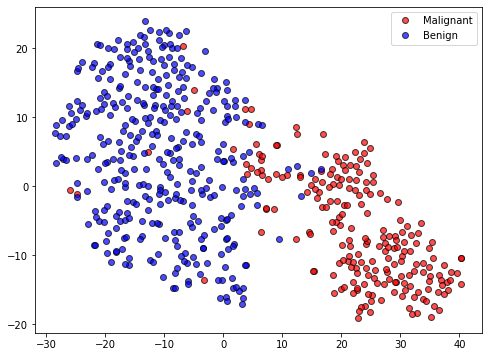

In [ ]:
#plot results

plt.figure(figsize=(8,6))

plt.plot(Xs_tsne[y==1][:,0], Xs_tsne[y==1][:,1], 'ro', alpha=0.7, markeredgecolor='k')
plt.plot(Xs_tsne[y==0][:,0], Xs_tsne[y==0][:,1], 'bo', alpha=0.7, markeredgecolor='k')

plt.legend(['Malignant','Benign']);

It is common to select a subset of features that have the largest correlation with the class labels. The effect of feature selection must be assessed within a complete modeling pipeline in order to give us an unbiased estimated of our model’s true performance. Hence, in the next section we will use cross-validation, before applying the PCA-based feature selection strategy in the model building pipeline.



#Prediction

##SVM

###Classification with holdout method

Going to run through data preprocessing from the start

In [ ]:
data=pd.read_csv('data.csv')

In [ ]:
#drop ID since it is not necessary

data.drop('id', axis=1, inplace=True)
data.drop('Unnamed: 32', axis=1, inplace=True)

In [ ]:
#encode diagnosis data

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

data['diagnosis']=le.fit_transform(data['diagnosis'])

In [ ]:
#split into X and y

X=data.drop('diagnosis', axis=1)
y=data['diagnosis']

In [ ]:
#split into training and test data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=rnd_seed, stratify=y)

In [ ]:
#standardize data

scaler=StandardScaler()
Xs_train=scaler.fit_transform(X_train)

In [ ]:
# Create an SVM classifier and train it on 70% of the data set.
from sklearn.svm import SVC

clf=SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True)
clf.fit(Xs_train, y_train)

SVC(gamma='auto', probability=True)

In [ ]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(gamma='auto', probability=True)

In [ ]:
#standardize testing data

Xs_test=scaler.transform(X_test)

In [ ]:
#test on testing set

classifier_score=clf.score(Xs_test, y_test)

In [ ]:
#results

print('The classifier accuracy score is {:03.2f}'.format(classifier_score))

The classifier accuracy score is 0.99


###Classification with cross-validation

Cross validation typically gives a better idea of performance than the holdout method

In [ ]:
# Get average of 3-fold cross-validation score using an SVC estimator.
from sklearn.model_selection import cross_val_score
n_folds = 3
clf_cv = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
cv_error = np.average(cross_val_score(clf_cv, Xs_train, y_train, cv=n_folds))

In [ ]:
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds, cv_error))

The 3-fold cross-validation accuracy score for this classifier is 0.96


###Classification with feature selection and cross validation

select 3 features that have the best correlation with class labels

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# model with just 3 features selected
clf_fs_cv = Pipeline([
    ('feature_selector', SelectKBest(f_classif, k=3)),
    ('svc', SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True))
])

scores = cross_val_score(clf_fs_cv, Xs_train, y_train, cv=3)

In [ ]:
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and uncertainty: (%.2f +- %.3f)%%"  %avg)

[0.93233083 0.93984962 0.9469697 ]
Average score and uncertainty: (93.97 +- 0.345)%


###Model accuracy: receiver operating characteristic curve (ROC)

In [ ]:
# The confusion matrix helps visualize the performance of the algorithm.
from sklearn.metrics import confusion_matrix, classification_report

y_pred=clf.fit(Xs_train, y_train).predict(Xs_test)
cm=confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[105,   2],
       [  0,  64]])

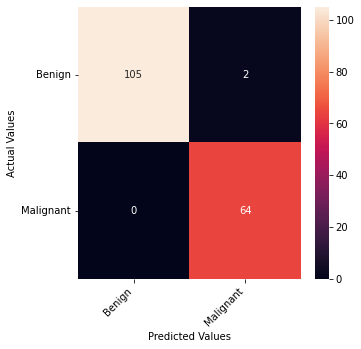

In [ ]:
# using seaborn to plot confusion matrix
classes=["Benign","Malignant"]
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(df_cm, annot=True, fmt="d")
ax.yaxis.set_ticklabels(ax.yaxis.get_ticklabels(), rotation=0, ha='right')
ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values');

using holdout method results, only two errors are made, those being false negatives

In [ ]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       107
           1       0.97      1.00      0.98        64

    accuracy                           0.99       171
   macro avg       0.98      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


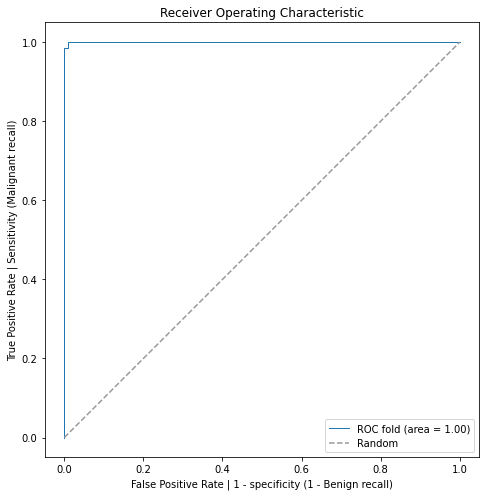

In [ ]:
from sklearn.metrics import roc_curve, auc
# Plot the receiver operating characteristic curve (ROC).
plt.figure(figsize=(10,8))
probas_ = clf.predict_proba(Xs_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate | 1 - specificity (1 - Benign recall)')
plt.ylabel('True Positive Rate | Sensitivity (Malignant recall)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.axes().set_aspect(1);

##Optimizing SVM classifier

want to tune c(gamma) and the type of kernel function used

- try simpler kernel functions
- try c values with less or more bias (c values less than and more than one)

Use gird search parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Train classifiers.
kernel_values = [ 'linear', 'poly', 'rbf', 'sigmoid' ]
param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6), 'kernel': kernel_values}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(Xs_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

Here we are finding the parameters that will give the best result using cross validation

In [ ]:
GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), n_jobs=1,
       param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': np.array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'C': np.array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

GridSearchCV(cv=5, error_score='raise', estimator=SVC(gamma='auto'), n_jobs=1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True)

In [ ]:
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 0.001, 'kernel': 'rbf'} with a score of 0.97


In [ ]:
best_clf = grid.best_estimator_
best_clf.probability = True

Refit model with best parameters

In [ ]:
y_pred = best_clf.fit(Xs_train, y_train).predict(Xs_test)
cm = confusion_matrix(y_test, y_pred)

Plot the confusion matrix again

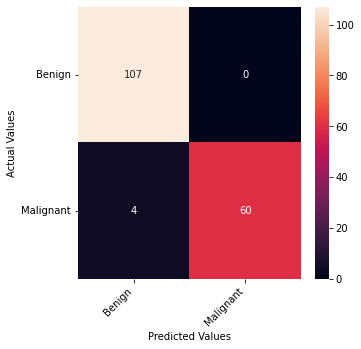

In [ ]:
# using seaborn to plot confusion matrix
classes=["Benign","Malignant"]
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(df_cm, annot=True, fmt="d")
ax.yaxis.set_ticklabels(ax.yaxis.get_ticklabels(), rotation=0, ha='right')
ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values');

this model still has more errors than the holdout method but cross validation is more robust so we can have higher confidence in out results

there are 4 errors all of which being false positives

In [ ]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



###Visualizing SVM boundary

in order to visualize boundary, we need to get multi dimensional data down to two dimensions, which we will use PCA to do

In [ ]:
pca=PCA(n_components=2)

Xs_train_pca=pca.fit_transform(Xs_train)

In [ ]:
X=Xs_train_pca
y=y_train

In [ ]:
# http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [ ]:
# http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [ ]:
X0, X1=X[:,0], X[:,1]

xx,yy=make_meshgrid(X0, X1)

In [ ]:
clf = SVC(C=10.0, kernel='rbf', gamma=0.001)
clf.fit(X, y)

SVC(C=10.0, gamma=0.001)

In [ ]:
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=10.0, gamma=0.001)

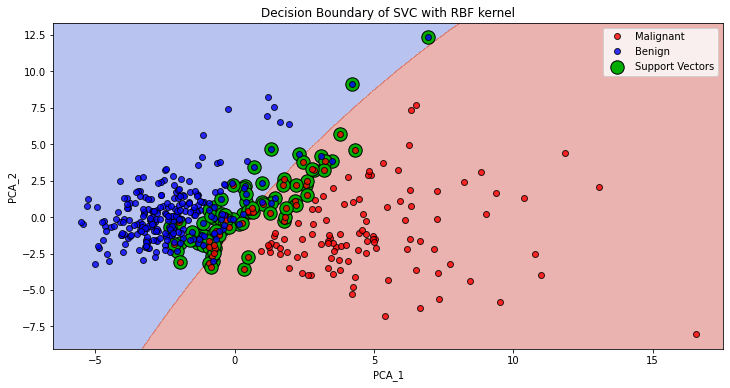

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.4)
plt.plot(Xs_train_pca[y_train == 1][:, 0],Xs_train_pca[y_train == 1][:, 1], 'ro', alpha=0.8, markeredgecolor='k', label='Malignant')
plt.plot(Xs_train_pca[y_train == 0][:, 0],Xs_train_pca[y_train == 0][:, 1], 'bo', alpha=0.8, markeredgecolor='k', label='Benign')

svs = clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#00AD00', edgecolors='k', label='Support Vectors')
    
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('Decision Boundary of SVC with RBF kernel')
plt.legend();

#Automate machine learning process using pipelines

can chain together transformations and such to save time

steps

1)seperate out validation set

2)setup test harness to use 10 fold training method

3)build 5 different models

4)select the best model

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X= data.drop('diagnosis', axis=1)
y=data['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)

In [ ]:
#normalize

scaler=StandardScaler()
Xs_train=scaler.fit(X_train)

Baseline estimation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

num_folds=10
num_instances=len(X_train)
scoring='accuracy'
results=[]
names=[]

for name, model in models:
  kf=KFold(n_splits=num_folds)
  cv_results=cross_val_score(model, X_train, y_train, cv=kf, scoring=scoring, n_jobs=-1)
  results.append(cv_results)
  names.append(name)

In [ ]:
print('10-Fold cross-validation accuracy score for the training data for all the classifiers') 
for name, cv_results in zip(names, results):
    print("%-10s: %.6f (%.6f)" % (name, cv_results.mean(), cv_results.std()))

10-Fold cross-validation accuracy score for the training data for all the classifiers
LR        : 0.944808 (0.047255)
LDA       : 0.967308 (0.035678)
KNN       : 0.932179 (0.037324)
CART      : 0.952244 (0.034392)
NB        : 0.937308 (0.042266)
SVM       : 0.922051 (0.041299)


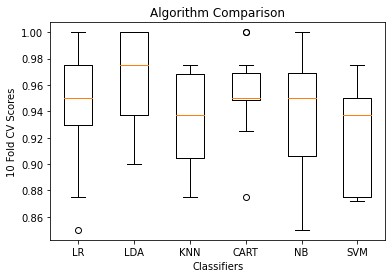

In [ ]:
# Compare Algorithms
plt.title( 'Algorithm Comparison' )
plt.boxplot(results)
plt.xlabel('Classifiers')
plt.ylabel('10 Fold CV Scores')
plt.xticks(np.arange(len(names)) + 1, names);

Evaluate algorithms with standardized data

In [ ]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []
for name, model in pipelines:
    kf = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)

In [ ]:
print('10-Fold cross-validation accuracy score for the training data for all the classifiers') 
for name, cv_results in zip(names, results):
    print("%-10s: %.6f (%.6f)" % (name, cv_results.mean(), cv_results.std()))

10-Fold cross-validation accuracy score for the training data for all the classifiers
ScaledLR  : 0.984936 (0.022942)
ScaledLDA : 0.967308 (0.035678)
ScaledKNN : 0.952179 (0.038156)
ScaledCART: 0.944808 (0.038341)
ScaledNB  : 0.937244 (0.043887)
ScaledSVM : 0.969936 (0.038398)


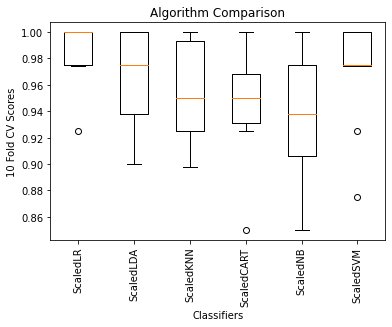

In [ ]:
# Compare Algorithms
plt.title( 'Algorithm Comparison' )
plt.boxplot(results)
plt.xlabel('Classifiers')
plt.ylabel('10 Fold CV Scores')
plt.xticks(np.arange(len(names)) + 1, names, rotation="90");

Scaled logistic regression and Scaled SVM seem to be the best models. Scaled LDA also might be interesting to investigate

In [ ]:
# Make Support Vector Classifier Pipeline
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', SVC(probability=True, verbose=False))])

In [ ]:
scores=cross_val_score(estimator=pipe_svc, X=X_train, y=y_train, cv=10, n_jobs=-1, verbose=0)
print('SVC Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

SVC Model Training Accuracy: 0.940 +/- 0.034


In [ ]:
from sklearn.model_selection import GridSearchCV

# Tune Hyperparameters
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},
              {'clf__C': param_range,'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

gs_svc = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

gs_svc = gs_svc.fit(X_train, y_train)

In [ ]:
gs_svc.best_estimator_.named_steps

{'scl': StandardScaler(),
 'pca': PCA(n_components=2),
 'clf': SVC(kernel='linear', probability=True)}

In [ ]:
gs_svc.best_estimator_.named_steps['clf'].coef_

array([[ 1.57606226, -0.87384284]])

In [ ]:
gs_svc.best_estimator_.named_steps['clf'].support_vectors_

array([[-5.59298401e-03,  2.54545060e-02],
       [-3.36380410e-01, -2.57254998e-01],
       [-3.38622032e-01, -7.19898441e-01],
       [-7.04681309e-01, -2.09847293e+00],
       [-1.29967755e+00, -1.62913054e+00],
       [-8.48983391e-02, -1.45496113e-01],
       [-4.64780833e-01, -9.01859111e-01],
       [ 1.42724855e+00,  1.42660623e+00],
       [-7.60785538e-01, -1.16034158e+00],
       [ 2.88483593e+00,  4.20900482e+00],
       [ 1.94950775e+00,  2.36149488e+00],
       [-1.54668166e+00, -4.47823571e+00],
       [-1.05181400e+00, -1.30862774e+00],
       [ 6.53277729e+00,  1.24974670e+01],
       [-1.18800512e+00, -1.55908705e+00],
       [-6.16694586e-01, -1.43967224e+00],
       [-6.72611104e-01, -1.22372306e+00],
       [ 2.19235999e+00,  4.45143040e+00],
       [ 1.27634550e+00,  1.13317453e+00],
       [-4.60409592e-01, -2.02632100e-01],
       [ 5.54733653e-02, -4.71520085e-02],
       [ 1.33960706e+00,  2.17971509e+00],
       [ 3.26676149e-01,  1.04285573e+00],
       [ 1.

In [ ]:
print('SVC Model Tuned Parameters Best Score: ', gs_svc.best_score_)
print('SVC Model Best Parameters: ', gs_svc.best_params_)

SVC Model Tuned Parameters Best Score:  0.9574358974358974
SVC Model Best Parameters:  {'clf__C': 1.0, 'clf__kernel': 'linear'}


Tuning hyperparameters for KNN

In [ ]:
knn_pipeline=Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('clf', KNeighborsClassifier())])

In [ ]:
scores=cross_val_score(estimator=knn_pipeline, X=X_train, y=y_train, cv=10, n_jobs=-1 )
print('Knn Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Knn Model Training Accuracy: 0.945 +/- 0.027


In [ ]:
# Tune Hyperparameters
param_range = range(1, 31)
param_grid = [{'clf__n_neighbors': param_range}]
# instantiate the grid
grid = GridSearchCV(estimator=knn_pipeline, 
                    param_grid=param_grid, 
                    cv=10, 
                    scoring='accuracy',
                    n_jobs=-1)
gs_knn = grid.fit(X_train, y_train)

In [ ]:
print('Knn Model Tuned Parameters Best Score: ', gs_knn.best_score_)
print('Knn Model Best Parameters: ', gs_knn.best_params_)

Knn Model Tuned Parameters Best Score:  0.9473717948717949
Knn Model Best Parameters:  {'clf__n_neighbors': 7}


SVM with optimal parameters has superior performance to KNN with optimal parameters

#Finalize model

In [ ]:
# Use best parameters
final_clf_svc = gs_svc.best_estimator_

# Get Final Scores
scores = cross_val_score(estimator=final_clf_svc,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=-1)

In [ ]:
print('Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('Final Accuracy on Test set: %.5f' % final_clf_svc.score(X_test, y_test))

Final Model Training Accuracy: 0.957 +/- 0.027
Final Accuracy on Test set: 0.95322


In [ ]:
#clf_svc.fit(X_train, y_train)
y_pred = final_clf_svc.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9532163742690059


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[105   2]
 [  6  58]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       107
           1       0.97      0.91      0.94        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

